## Homework 4
### CAP 5610 - Machine Learning
### Suma Marri
### March 14, 2022

#### Problem 1: Support Vector Machine Algorithm

In [1]:
# Evaluate using Cross Validation
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib . pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn import metrics

# read and load the csv data file
filename = 'Dataset4/voice.csv '
dataframe = pd.read_csv(filename)

# converting the dataset to a numpy array
array = dataframe.values

# separate array into input and output components
X = array [:,:-1]
Y = array [:,-1]

In [2]:
voice_df = dataframe

###### (a) 
Use LabelEncoder to convert string values to integer for labels Y.

In [3]:
le = LabelEncoder()
Y = le.fit_transform(Y)

###### (b) 
Standardize your input data using StandardScaler , and split your data into train and test
with 20% test size, and 'random state' =1. 

In [4]:
std = StandardScaler()
X_std = std.fit_transform(X)

In [5]:
X_std

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.2, random_state=1)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2534, 20), (634, 20), (2534,), (634,))

###### (c) 
Run SVM with default hyperparameters (no argument to SVC), and measure the accuracy of your model on test set. 

In [8]:
svc = SVC()
svc.fit(X_train,y_train)
y_test_pred = svc.predict(X_test)
print("Accuracy score on test set with default parameter: ", metrics.accuracy_score(y_test,y_test_pred))

Accuracy score on test set with default parameter:  0.9763406940063092


###### (d) 
Use linear, rbf and polynomial kernels as parameters for kernel in SVC and report the accuracy for all three cases on the test set.

In [9]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_test_pred = svc.predict(X_test)
print("Accuracy score on test set with 'rbf' kernel: ", metrics.accuracy_score(y_test,y_test_pred))

Accuracy score on test set with 'rbf' kernel:  0.9779179810725552


In [10]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_test_pred = svc.predict(X_test)
print("Accuracy score on test set with 'rbf' kernel: ", metrics.accuracy_score(y_test,y_test_pred))

Accuracy score on test set with 'rbf' kernel:  0.9763406940063092


In [11]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_test_pred = svc.predict(X_test)
print("Accuracy score on test set with 'rbf' kernel: ", metrics.accuracy_score(y_test,y_test_pred))

Accuracy score on test set with 'rbf' kernel:  0.9589905362776026


###### (e)
For your SVM model with linear kernel, perform K-fold cross validation on your training data (use 10 folds, random state =13, shuffle = True) to figure out the optimal value for the regularization hyperparameter C for all integers in the range of [1,26]. Plot the accuracy of the SVM model in terms of the value of hyperparameter C varying from 1 to 26. Choose and report the best value for C.

In [12]:
accuracy_scores = []
cv = KFold(n_splits=10, random_state=13, shuffle=True)
for c in range(1,26):
    svc = SVC(C = c, kernel = 'linear')
    score = cross_val_score(svc, X_train, y_train, cv=cv, scoring='accuracy')
    accuracy_scores.append(score.mean())

<AxesSubplot:>

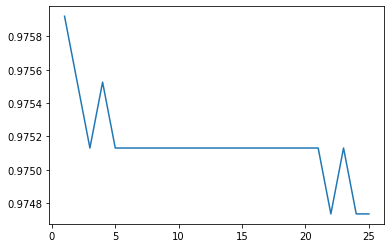

In [13]:
sns.lineplot(x=list(range(1,26)),y = accuracy_scores)

Best value of C = 1.0

###### (f)
For your SVM model with rbf kernel, perform K-fold cross validation on your training data (use 10 folds, random state =13, shuffle = True) to figure out the optimal value for the hyperparameter Î³ taking values from [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]. Plot the accuracy of the SVM model in terms of the values of Î³. Choose and report the best value for γ.

In [14]:
gammavals= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
accuracy_scores = []
cv = KFold(n_splits=10, random_state=13, shuffle=True)
for g in gammavals:
    svc = SVC( gamma = g, kernel = 'rbf')
    score = cross_val_score(svc, X_train, y_train, cv=cv, scoring='accuracy')
    accuracy_scores.append(score.mean())

<AxesSubplot:>

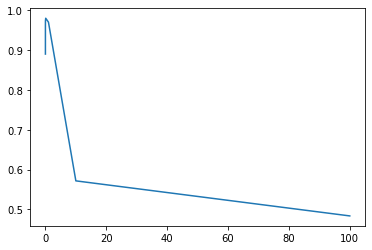

In [15]:
sns.lineplot(x=gammavals,y = accuracy_scores)

In [16]:
gammavals

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

Best gamma value = 0.001

#### Problem 2: K-Means and Hierarchical Clustering

In [17]:
# import necessary packages to the Jupyter notebook
# Create a pipeline that extracts features from the data then creates a model
import numpy as np
import pandas as pd

# data visualization
import matplotlib . pyplot as plt
import seaborn as sns
%matplotlib inline

# clustering model library
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# read and load the csv data file
filename = "Dataset4/Mall_Customers.csv"
dataset = pd.read_csv (filename)
X = dataset.drop (['Gender','CustomerID'], axis =1 )

In [18]:
mall_df = dataset

In [19]:
std = StandardScaler()
X_std = std.fit_transform(X)

###### (a)
Use sklearn function Kmeans() to perform K-Means clustering algorithm on the data, with the number of clusters changing in the range of [1, 15]. Use init='k-means++' and random_state = 42 for the initialization of your K-means algorithm.

In [20]:
inertia = []
for k in range(1,16):
    kmc = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmc.fit(X_std)
    inertia.append(kmc.inertia_)

C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


###### (b) 
Plot the effect of increased cluster numbers on inertia score (Sum of squared distances of samples to their closest cluster center). Use the Elbow method to choose the best number of clusters based on intertia scoring. 

<AxesSubplot:>

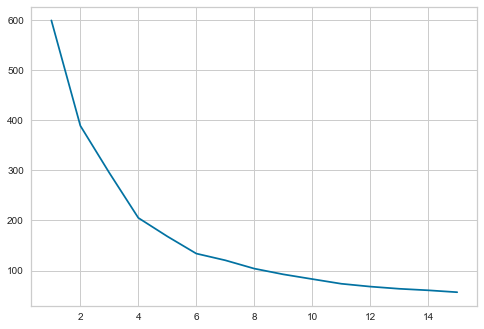

In [21]:
sns.lineplot(x = list(range(1,16)), y =inertia)

Best K appers to be k = 6

###### (c) 
Use the kmeans.labels attribute to report (print) the cluster labels of the observations for the best number of clusters you found using Elbow method.

In [22]:
kmc = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmc.fit(X_std)
print(kmc.labels_)

[0 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5
 0 5 0 1 0 5 3 5 0 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 4 3 4 2 4 2 4 2 4 3 4 2 4 2 4 3 4 2 4 3 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


###### (d) 
From Yellowbrick library, use KElbowVisualizer to visualize the Elbow plot for K value chaining in the range of (1,15); and use SilhouetteVisualizer to visualize the Silhouette plot for numbers of clusters 2, 3, 4 and 5.

C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


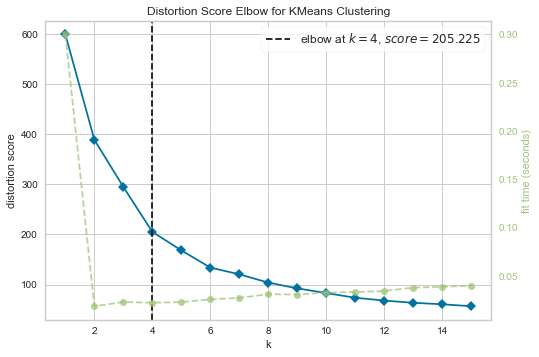

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
kmc = KMeans(init='k-means++', random_state=42)
visualizer = KElbowVisualizer(kmc, k=list(range(1,16)))
visualizer.fit(X_std)
visualizer.show()

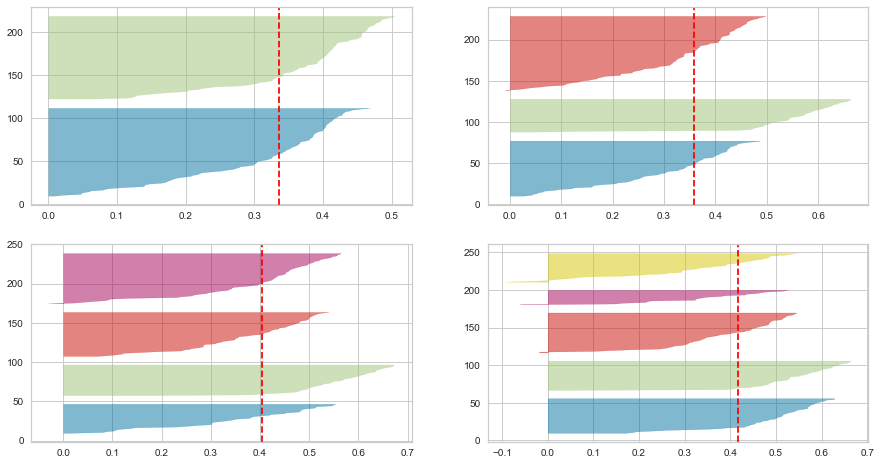

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2, 3, 4, 5]:
    kmc = KMeans(n_clusters=k, init='k-means++', random_state=42)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(kmc, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_std)

###### (e) 
Use sklearn function AgglomerativeClustering() to perform agglomerative hierarchical clustering on the data, with n clusters=5 and linkage='average' and compute full tree=True. Print the clustering labels. Plot the 'Spending Score (1-100)' (Y axis) in terms of 'Annual Income (k$)' (X axis) for the 5 clusters shown by different colors (See the code from lab session).

In [25]:
ac = AgglomerativeClustering(n_clusters=5,  linkage='average', compute_full_tree=True)
ac.fit(X_std)
print(ac.labels_)

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 4 1 4 1 4 1 4 1 1 1 4 1 1 4 4 4 4 4 1 4 4 1 4 4 4 1 4 4 1 1 4 4 4 4
 4 1 4 4 1 4 4 4 4 4 1 4 4 1 4 4 4 1 4 4 4 1 4 1 4 1 1 4 4 1 4 1 4 4 4 4 4
 1 4 1 1 1 4 4 4 4 1 4 4 3 1 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

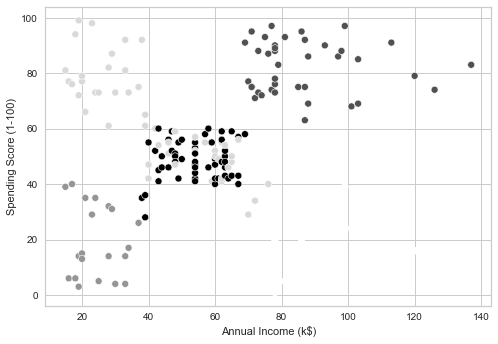

In [26]:
sns.scatterplot(data =X, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', c = ac.labels_)

###### (f) 
Use the linkage() and dendrogram() functions from scipy to plot the hierarchical clustering dendrograms using 'complete' linkage, and Euclidean distance as the dissimilarity measure.


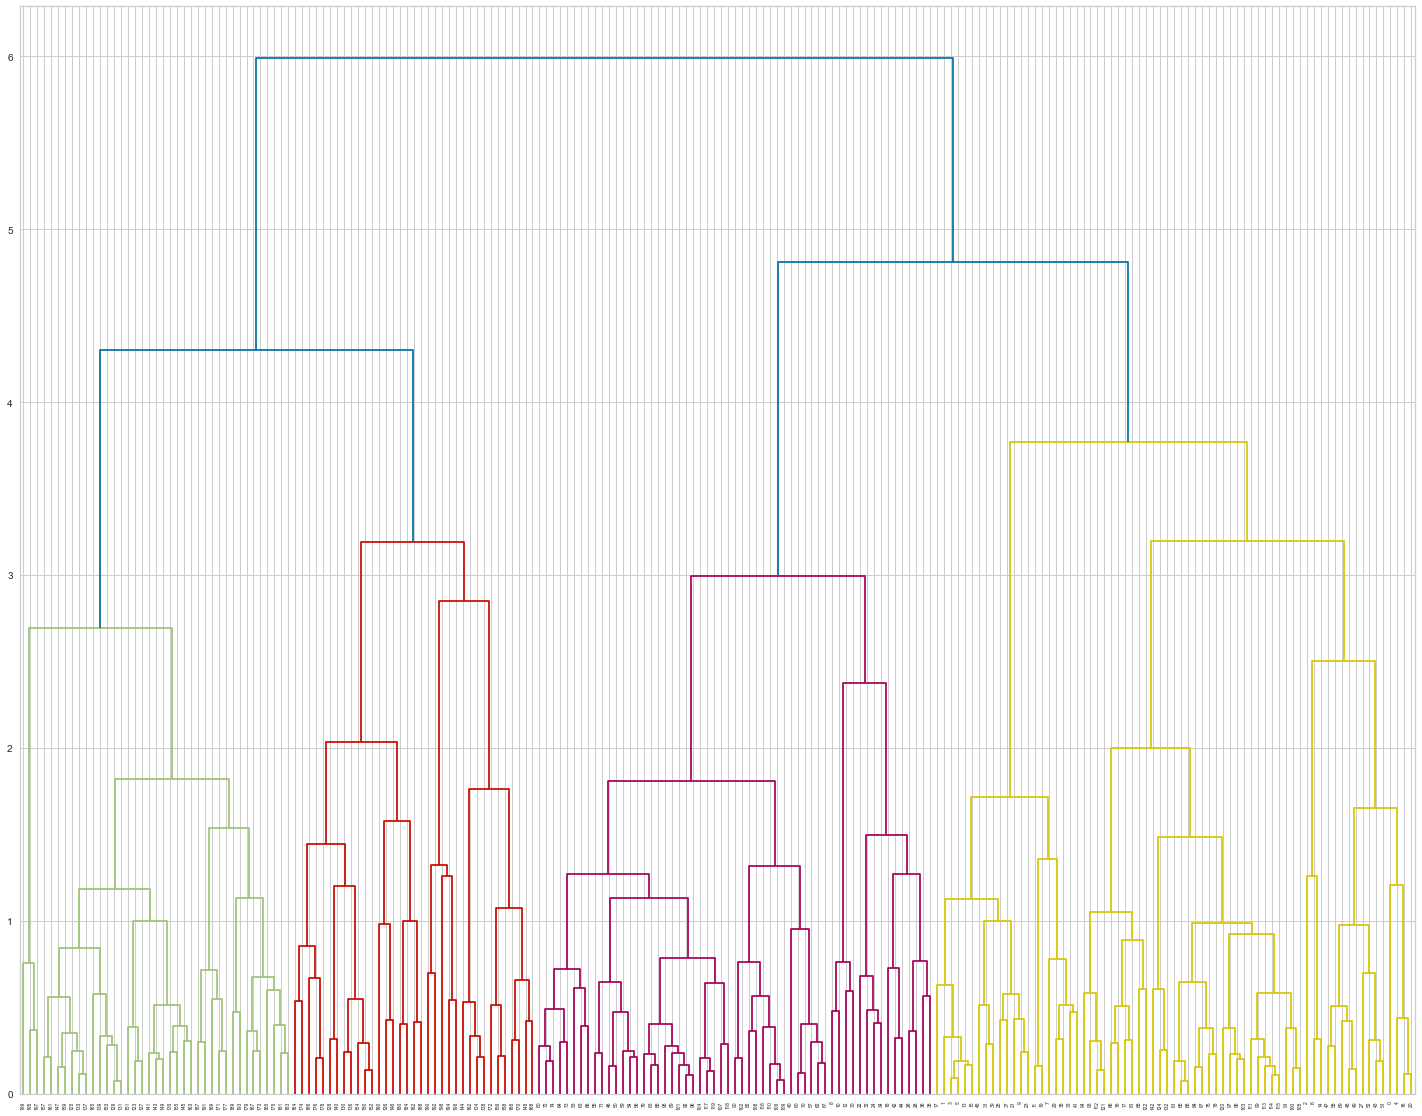

In [27]:
l = linkage(X_std, 'complete', metric='euclidean')
fig = plt.figure(figsize=(25, 20))
dg = dendrogram(l)
plt.show()

###### (g)
Use cut tree() function from scipy to determine the cluster labels for each observation associated with 3 number of clusters in dendrogram.

In [28]:
cutTree = cut_tree(l, n_clusters=3)

In [29]:
print(cutTree)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]